In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fl_g13.config import RAW_DATA_DIR
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from collections import Counter

2025-04-25 11:50:20.065 | INFO     | fl_g13.config:<module>:11 - PROJ_ROOT path is: /home/massimiliano/Projects/fl-g13


## Load data

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])
cifar100_train = datasets.CIFAR100(root=RAW_DATA_DIR, train=True, download=True, transform=transform)
cifar100_test = datasets.CIFAR100(root=RAW_DATA_DIR, train=False, download=True, transform=transform)


## Dataset overview

In [4]:
print(f"Training samples: {len(cifar100_train)}")
print(f"Test samples: {len(cifar100_test)}")
print(f"Classes: {len(cifar100_train.classes)}")
print(f"First 5 classes: {cifar100_train.classes[:5]}")

Training samples: 50000
Test samples: 10000
Classes: 100
First 5 classes: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver']


## Display a few sample images

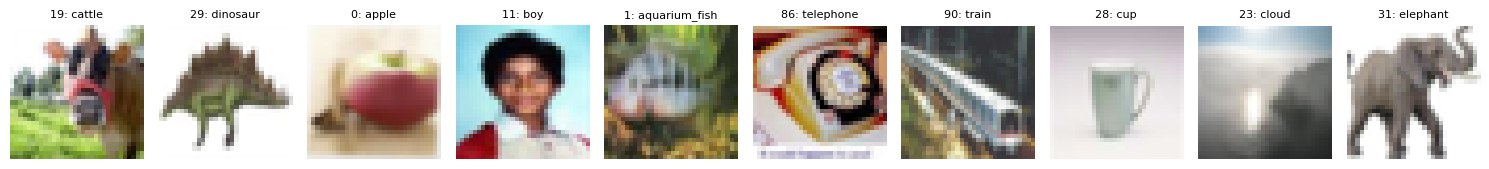

In [21]:
def show_samples(dataset, n=10):
    fig, axes = plt.subplots(1, n, figsize=(15, 2))
    for i in range(n):
        img, label = dataset[i]
        axes[i].imshow(np.transpose(img.numpy(), (1, 2, 0)))
        axes[i].axis('off')
        if hasattr(dataset, 'classes'):
            axes[i].set_title(f"{label}: {dataset.classes[label]}", fontsize=8)
        else:
            axes[i].set_title(f"Label: {label}", fontsize=8)
    plt.tight_layout()
    plt.show()

show_samples(cifar100_train)

In [22]:
from torch.utils.data import Subset

def extract_images_by_label(dataset, target_label):
    matching_indices = [i for i in range(len(dataset)) if dataset[i][1] == target_label]
    return Subset(dataset, matching_indices)

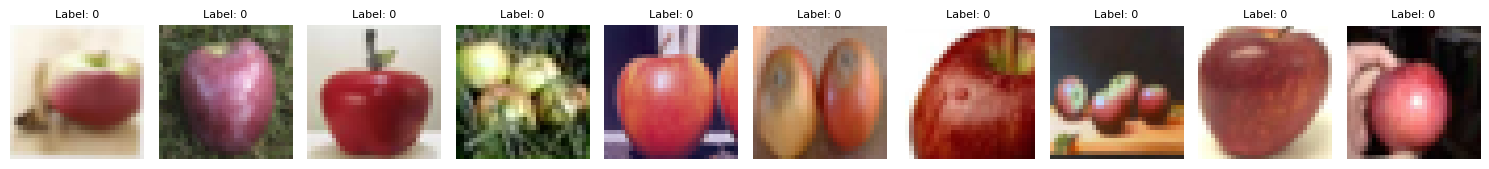

In [23]:
apples = extract_images_by_label(cifar100_train, 0)
show_samples(apples)

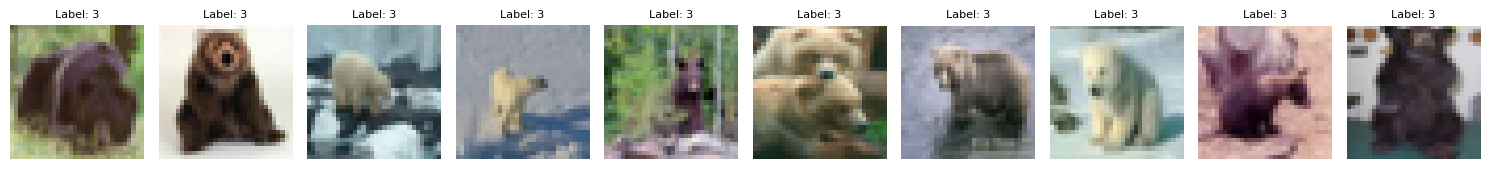

In [26]:
bears = extract_images_by_label(cifar100_train, 3)
show_samples(bears)